In [141]:
import hashlib
import time
import random
import json
import matplotlib
import matplotlib.pyplot as plt

In [142]:
class Transaction:
    def __init__(self, sender, recipient, amount):
        self.sender = sender
        self.recipient = recipient
        self.amount = amount
    
    def to_dict(self):
        return {
            'sender': self.sender,
            'recipient': self.recipient,
            'amount': self.amount,
        }

        
class Block:
    def __init__(self, index, previous_hash, transactions, timestamp, proof):
        self.index = index
        self.previous_hash = previous_hash
        self.transactions = transactions
        self.timestamp = timestamp
        self.proof = proof

    def calculate_hash(self):
        return hashlib.sha256(f"{self.index}{self.previous_hash}{self.transactions}{self.timestamp}{self.proof}".encode()).hexdigest()


In [60]:

class Blockchain:
    def __init__(self):
        self.chain = []
        self.current_transactions = []
        self.create_genesis_block()

    def create_genesis_block(self):
        self.create_block(proof=0, previous_hash="0")

    def create_block(self, proof, previous_hash):
        block = Block(
            index=len(self.chain) + 1,
            previous_hash=previous_hash or self.hash(self.chain[-1]),
            transactions=self.current_transactions,
            timestamp=time.time(),
            proof=proof,
        )
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append(Transaction(sender, recipient, amount))

    @staticmethod
    def hash(block):
        return block.calculate_hash()

    def last_block(self):
        return self.chain[-1] if self.chain else None


In [61]:
class PoWConsensus:
    @staticmethod
    def proof_of_work(last_proof):
        proof = 0
        while PoWConsensus.validate_proof(last_proof, proof) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof):
        guess = f"{last_proof}{proof}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"


In [143]:
class PoSConsensus:
    def __init__(self):
        self.validators = []
        self.chain = []
        self.current_transactions = []
        self.create_genesis_block()

    def create_genesis_block(self):
        self.create_block(proof=0, previous_hash="0")

    def create_block(self, proof, previous_hash):
        block = Block(
            index=len(self.chain) + 1,
            previous_hash=previous_hash or self.hash(self.chain[-1]),
            transactions=self.current_transactions,
            timestamp=time.time(),
            proof=proof,
        )
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append(Transaction(sender, recipient, amount))

    def add_validator(self, validator):
        self.validators.append(validator)

    def select_validator(self):
        return random.choice(self.validators)

    def proof_of_stake(self, last_block):
        validator = self.select_validator()
        proof = 0
        while self.validate_proof(last_block.proof, proof, validator) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof, validator):
        guess = f"{last_proof}{proof}{validator}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    def last_block(self):
        return self.chain[-1] if self.chain else None

    def get_previous_hash(self, last_block):
        return self.hash(last_block)

    @staticmethod
    def hash(block):
        block_string = json.dumps(block.__dict__, sort_keys=True, default=lambda x: x.to_dict())
        return hashlib.sha256(block_string.encode()).hexdigest()

In [144]:
# uPDATED
class DPoSConsensus:
    def __init__(self):
        self.delegates = []
        self.chain = []
        self.current_transactions = []
        self.votes = {}  # Dictionary to store votes
        self.create_genesis_block()

    def create_genesis_block(self):
        self.create_block(proof=0, previous_hash="0")

    def create_block(self, proof, previous_hash):
        block = Block(
            index=len(self.chain) + 1,
            previous_hash=previous_hash or self.hash(self.chain[-1]),
            transactions=self.current_transactions,
            timestamp=time.time(),
            proof=proof,
        )
        self.current_transactions = []
        self.chain.append(block)
        return block

    def add_transaction(self, sender, recipient, amount):
        self.current_transactions.append(Transaction(sender, recipient, amount))

    def add_delegate(self, delegate):
        self.delegates.append(delegate)
        self.votes[delegate] = []  # Initialize votes for the new delegate

    def select_delegate(self):
        return random.choice(self.delegates)

    def delegated_proof_of_stake(self, last_block):
        delegate = self.select_delegate()
        proof = 0
        while self.validate_proof(last_block.proof, proof, delegate) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof, delegate):
        guess = f"{last_proof}{proof}{delegate}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:4] == "0000"

    def last_block(self):
        return self.chain[-1] if self.chain else None

    def get_previous_hash(self, last_block):
        return self.hash(last_block)

    @staticmethod
    def hash(block):
        block_string = json.dumps(block.__dict__, sort_keys=True, default=lambda x: x.to_dict())
        return hashlib.sha256(block_string.encode()).hexdigest()

    def vote(self, delegate, voter):
        if delegate in self.delegates and voter in self.delegates:
            self.votes[delegate].append(voter)

    def get_vote_count(self, delegate):
        return len(self.votes.get(delegate, []))


In [145]:
def simulate_pow_throughputs():
    blockchain_pow = Blockchain()
    num_transactions_pow = [100, 500, 1000, 1500, 2000]
    throughputs_pow = {}

    for num_tx in num_transactions_pow:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pow.add_transaction("Arafat", "Chopra", 1)
        last_block_pow = blockchain_pow.last_block()
        last_proof_pow = last_block_pow.proof
        proof_pow = PoWConsensus.proof_of_work(last_proof_pow)
        blockchain_pow.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pow = blockchain_pow.hash(last_block_pow)
        blockchain_pow.create_block(proof_pow, previous_hash_pow)
        end_time = time.time()
        throughput_pow = num_tx / (end_time - start_time)
        throughputs_pow[num_tx] = throughput_pow
    print(throughputs_pow)
    visualize_pow_throughput(throughputs_pow)
    

In [146]:
def simulate_pos_throughputs():
    blockchain_pos = PoSConsensus()
    validator_addresses = ["Validator1", "Validator2", "Validator3"]
    for address in validator_addresses:
        blockchain_pos.add_validator(address)

    
    # Simulation for PoS
    num_transactions_pos = [100, 500, 1000, 1500, 2000]
    throughputs_pos = {}
    pos_latencies = {}


    for num_tx in num_transactions_pos:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pos.add_transaction("Arafat", "Chopra", 1)
        last_block_pos = blockchain_pos.last_block()
        proof_pos = blockchain_pos.proof_of_stake(last_block_pos)
        blockchain_pos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        
        previous_hash_pos = blockchain_pos.get_previous_hash(last_block_pos)
        blockchain_pos.create_block(proof_pos, previous_hash_pos)
        end_time = time.time()
        pos_latencies[num_tx] = (end_time - start_time) / num_tx
        
        # Calculate throughput
        time_taken = end_time - start_time
        throughput_pos = num_tx / time_taken
        throughputs_pos[num_tx] = throughput_pos

        # Calculate and store latency
        pos_latencies[num_tx] = time_taken / num_tx


    visualize_pos_throughput(throughputs_pos)


In [147]:
def simulate_dpos_throughputs():
    blockchain_dpos = DPoSConsensus()
    delegate_addresses = ["Delegate1", "Delegate2", "Delegate3"]  
    for address in delegate_addresses:
        blockchain_dpos.add_delegate(address)

    num_transactions_dpos = [100, 500, 1000, 1500, 2000]
    throughputs_dpos = {}

    for num_tx in num_transactions_dpos:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_dpos.add_transaction("Arafat", "Chopra", 1)
        last_block_dpos = blockchain_dpos.last_block()
        proof_dpos = blockchain_dpos.delegated_proof_of_stake(last_block_dpos)
        blockchain_dpos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_dpos = blockchain_dpos.get_previous_hash(last_block_dpos)
        blockchain_dpos.create_block(proof_dpos, previous_hash_dpos)
        end_time = time.time()
        
        time_taken = end_time - start_time
        throughput_dpos = num_tx / time_taken
        throughputs_dpos[num_tx] = throughput_dpos
        print(throughputs_dpos)
    visualize_dpos_throughput(throughputs_dpos)


In [148]:
def simulate_latency_impact():
    num_transactions = [100, 500, 1000, 1500, 2000]
    pow_latencies = {}
    pos_latencies = {}
    dpos_latencies = {}

    for num_tx in num_transactions:
        # PoW simulation
        blockchain_pow = Blockchain()
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pow.add_transaction("Aarafat", "Chopra", 1)
        last_block_pow = blockchain_pow.last_block()
        last_proof_pow = last_block_pow.proof
        proof_pow = PoWConsensus.proof_of_work(last_proof_pow)
        blockchain_pow.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pow = blockchain_pow.hash(last_block_pow)
        blockchain_pow.create_block(proof_pow, previous_hash_pow)
        end_time = time.time()
        pow_latencies[num_tx] = (end_time - start_time) / num_tx

        # PoS simulation
        blockchain_pos = PoSConsensus()
        validator_addresses = ["Validator1", "Validator2", "Validator3"] 
        for address in validator_addresses:
            blockchain_pos.add_validator(address)

        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pos.add_transaction("Aarafat", "Chopra", 1)
        last_block_pos = blockchain_pos.last_block()
        proof_pos = blockchain_pos.proof_of_stake(last_block_pos)
        blockchain_pos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pos = blockchain_pos.get_previous_hash(last_block_pos)
        blockchain_pos.create_block(proof_pos, previous_hash_pos)
        end_time = time.time()
        pos_latencies[num_tx] = (end_time - start_time) / num_tx
        
        
        
        # DPoS simulation
        blockchain_dpos = DPoSConsensus()
        delegate_addresses = ["Delegate1", "Delegate2", "Delegate3"]
        for address in delegate_addresses:
            blockchain_dpos.add_delegate(address)

        start_time = time.time()
        for _ in range(num_tx):
            blockchain_dpos.add_transaction("Aarafat", "Chopra", 1)
        last_block_dpos = blockchain_dpos.last_block()
        proof_dpos = blockchain_dpos.delegated_proof_of_stake(last_block_dpos)
        blockchain_dpos.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_dpos = blockchain_dpos.get_previous_hash(last_block_dpos)
        blockchain_dpos.create_block(proof_dpos, previous_hash_dpos)
        end_time = time.time()
        dpos_latencies[num_tx] = (end_time - start_time) / num_tx
        
    # Visualize the impact of different numbers of transactions on latency for PoW and PoS
    visualize_PoW_latency_impact(pow_latencies)
    visualize_PoS_latency_impact(pos_latencies)
    visualize_dpos_latency_impact(dpos_latencies)
    visualize_latency_comparison(pow_latencies, pos_latencies,dpos_latencies)


In [149]:
'''
Simulate latency for different transection.
using a fixed number of transactions (1000 in this) to calculate the latency for each case.
'''

def simulate_latency_with_nodes_pow(num_nodes):
    # Simulate PoW latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        blockchain_nodes = Blockchain()
        start_time = time.time()
        for _ in range(1000):  # Simulate with a fixed number of transactions
            blockchain_nodes.add_transaction("Arafat", "Chopra", 1)
        last_block_nodes = blockchain_nodes.last_block()
        last_proof_nodes = last_block_nodes.proof
        proof_nodes = PoWConsensus.proof_of_work(last_proof_nodes)
        blockchain_nodes.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_nodes = blockchain_nodes.hash(last_block_nodes)
        blockchain_nodes.create_block(proof_nodes, previous_hash_nodes)
        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies

def simulate_latency_with_nodes_pos(num_nodes):
    # Simulate PoS latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        blockchain_nodes = PoSConsensus()
        validator_addresses = ["Validator1", "Validator2", "Validator3"]
        for address in validator_addresses:
            blockchain_nodes.add_validator(address)
        start_time = time.time()
        for _ in range(1000):  # Simulate with a fixed number of transactions
            blockchain_nodes.add_transaction("Arafat", "Chopra", 1)
        last_block_nodes = blockchain_nodes.last_block()
        proof_nodes = blockchain_nodes.proof_of_stake(last_block_nodes)
        blockchain_nodes.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_nodes = blockchain_nodes.get_previous_hash(last_block_nodes)
        blockchain_nodes.create_block(proof_nodes, previous_hash_nodes)
        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies


def simulate_latency_with_nodes_dpos(num_nodes):
    # Simulate DPoS latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        blockchain_nodes = DPoSConsensus()
        delegate_addresses = ["Delegate1", "Delegate2", "Delegate3"]
        for address in delegate_addresses:
            blockchain_nodes.add_delegate(address)
        start_time = time.time()
        for _ in range(1000):  # Simulate with a fixed number of transactions
            blockchain_nodes.add_transaction("Arafat", "Chopra", 1)
        last_block_nodes = blockchain_nodes.last_block()
        proof_nodes = blockchain_nodes.delegated_proof_of_stake(last_block_nodes)
        blockchain_nodes.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_nodes = blockchain_nodes.get_previous_hash(last_block_nodes)
        blockchain_nodes.create_block(proof_nodes, previous_hash_nodes)
        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies

In [150]:
# Visualization functions for PoW and PoS

def visualize_pow_throughput(throughputs):
    plt.plot(throughputs.keys(), throughputs.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (Proof of Work)')
    plt.grid(True)
    plt.show()

def visualize_pos_throughput(throughputs):
    plt.plot(throughputs.keys(), throughputs.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (Proof of Stake)')
    plt.grid(True)
    plt.show()
    
def visualize_dpos_throughput(throughputs_dpos):
    plt.plot(throughputs_dpos.keys(), throughputs_dpos.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (DPoS)')
    plt.grid(True)
    plt.show()

def visualize_PoW_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (PoW)')
    plt.grid(True)
    plt.show()
    
def visualize_PoS_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (PoS)')
    plt.grid(True)
    plt.show()

    
def visualize_dpos_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (DPoS)')
    plt.grid(True)
    plt.show()


In [151]:
def visualize_latency_comparison(pow_latencies, pos_latencies, dpos_latencies):
    num_transactions = list(pow_latencies.keys())
    pow_latency_values = list(pow_latencies.values())
    pos_latency_values = list(pos_latencies.values())
    dpos_latency_values = list(dpos_latencies.values())

    width = 100
    fig, ax = plt.subplots()
    bar1 = ax.bar([num - width for num in num_transactions], pow_latency_values, width,
                  label='PoW Latency', color='skyblue', edgecolor='none', linewidth=2)
    bar2 = ax.bar(num_transactions, pos_latency_values, width,
                  label='PoS Latency', color='lightcoral', edgecolor='none', linewidth=2)
    bar3 = ax.bar([num + width for num in num_transactions], dpos_latency_values, width,
                  label='DPoS Latency', color='lightgreen', edgecolor='none', linewidth=2)

    ax.set_xlabel('Number of Transactions')
    ax.set_ylabel('Average Latency (Seconds)')
    ax.set_title('Comparison of Average Latency (PoW vs. PoS vs. DPoS)')
    ax.set_xticks(num_transactions)
    ax.legend()
    ax.grid(True)

    plt.show()


In [152]:
"""
Visualization of PoW and PoS latency for different number of nodes. 
"""
def visualize_latency_with_nodes(pow_latencies, pos_latencies, dpos_latencies):
    num_nodes_pow = list(pow_latencies.keys())
    pow_latency_values = [pow_latencies[num_n] for num_n in num_nodes_pow]
    num_nodes_pos = list(pos_latencies.keys())
    pos_latency_values = [pos_latencies[num_n] for num_n in num_nodes_pos]
    num_nodes_dpos = list(dpos_latencies.keys())
    dpos_latency_values = [dpos_latencies[num_n] for num_n in num_nodes_dpos]

    width = 1.3
    fig, ax = plt.subplots()
    bar1 = ax.bar([num - width for num in num_nodes_pow], pow_latency_values, width,
                  label='PoW Latency', color='royalblue', edgecolor='none', linewidth=0.1)
    bar2 = ax.bar(num_nodes_pos, pos_latency_values, width,
                  label='PoS Latency', color='orange', edgecolor='none', linewidth=0.1)
    bar3 = ax.bar([num + width for num in num_nodes_dpos], dpos_latency_values, width,
                  label='DPoS Latency', color='green', edgecolor='none', linewidth=0.1)

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Average Latency (Seconds)')
    ax.set_title('Average Latency with Varying Numbers of Nodes')
    ax.set_xticks(num_nodes_pow + num_nodes_pos + num_nodes_dpos)
    ax.legend()
    ax.grid(True)

    plt.show()


{100: 18.639533549484106, 500: 8.779399473908024, 1000: 99.38874899486964, 1500: 148.85451374096593, 2000: 197.32384930226917}


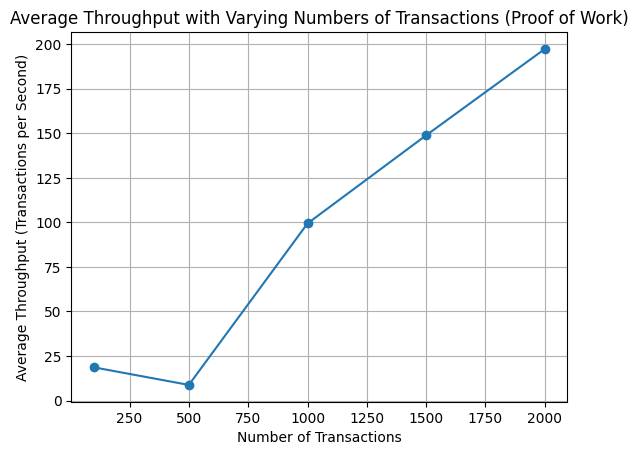

In [153]:
simulate_pow_throughputs()

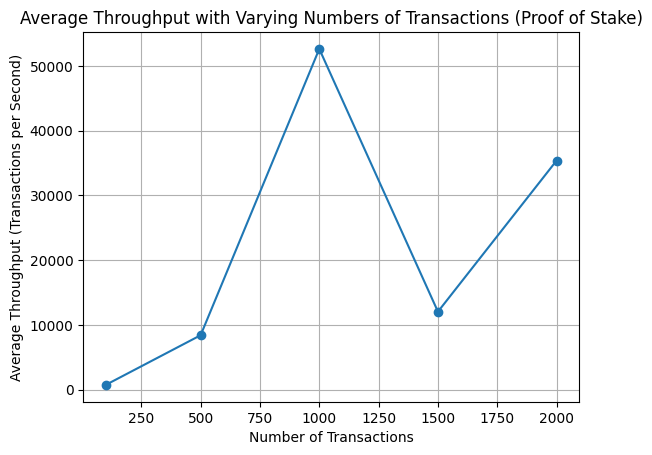

In [73]:
simulate_pos_throughputs()

{100: 2018.2485720747381}
{100: 2018.2485720747381, 500: 5122.200945718863}
{100: 2018.2485720747381, 500: 5122.200945718863, 1000: 3632.309449641948}
{100: 2018.2485720747381, 500: 5122.200945718863, 1000: 3632.309449641948, 1500: 8826.991716613913}
{100: 2018.2485720747381, 500: 5122.200945718863, 1000: 3632.309449641948, 1500: 8826.991716613913, 2000: 8083.480848414883}


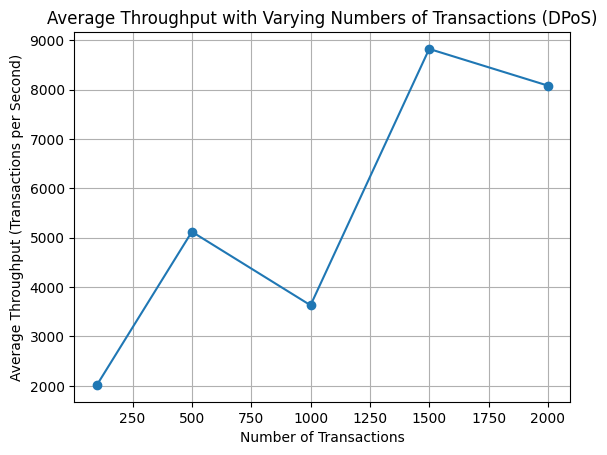

In [74]:
# Call the simulation function
simulate_dpos_throughputs()

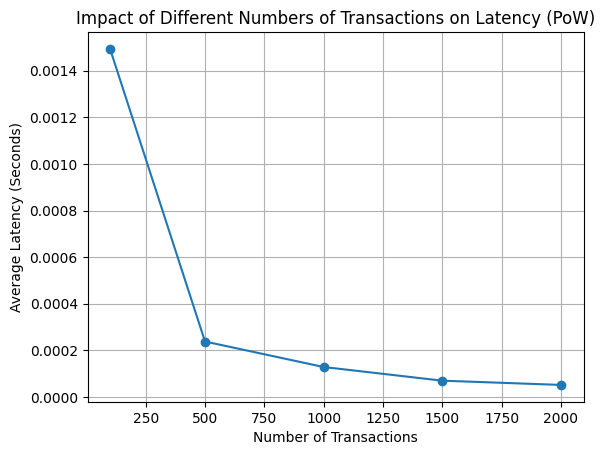

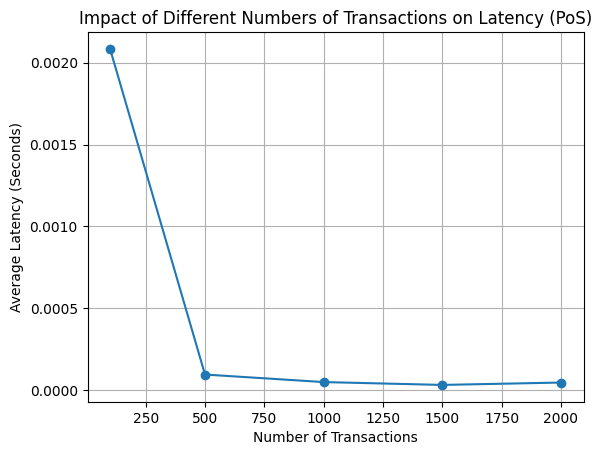

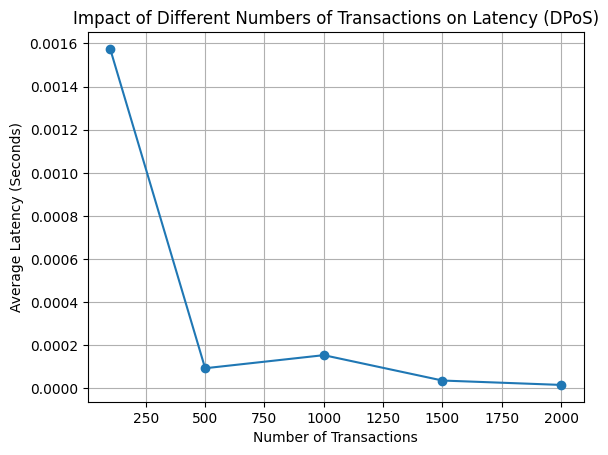

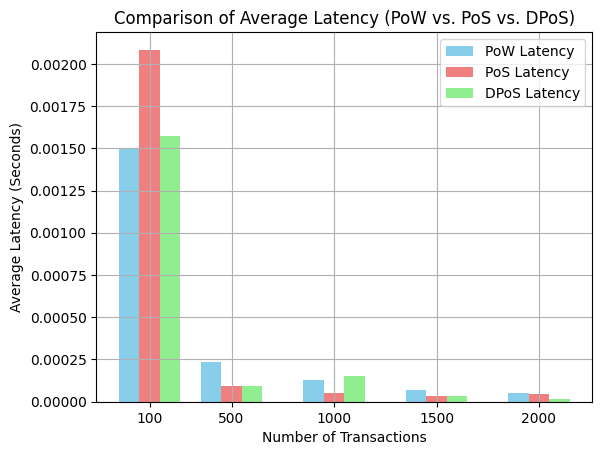

In [75]:
simulate_latency_impact()

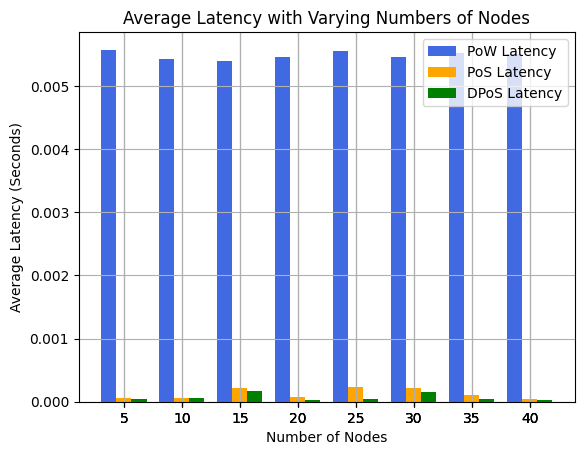

In [155]:
# Average latency with varying numbers of nodes
num_nodes = [5, 10, 15, 20, 25, 30, 35, 40]
# Simulate latency for PoW and PoS with varying numbers of nodes
pow_latencies = simulate_latency_with_nodes_pow(num_nodes)
pos_latencies = simulate_latency_with_nodes_pos(num_nodes)
dpos_latencies = simulate_latency_with_nodes_dpos(num_nodes)
# Visualize the data
visualize_latency_with_nodes(pow_latencies, pos_latencies,dpos_latencies)

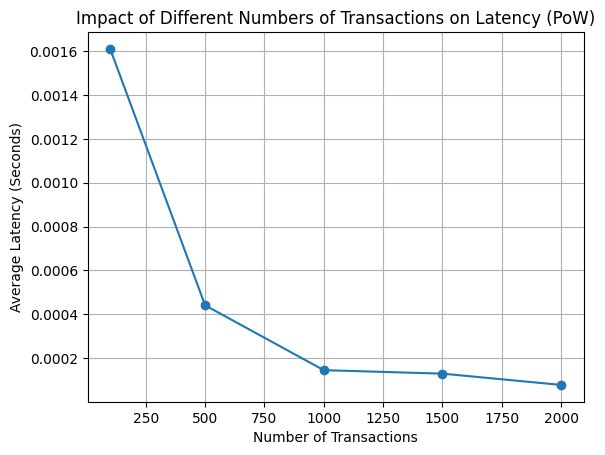

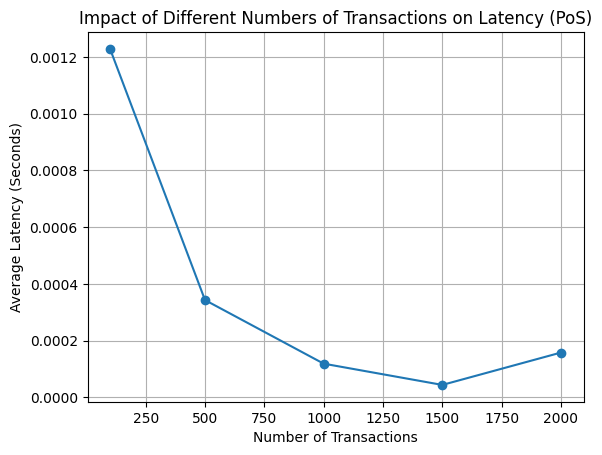

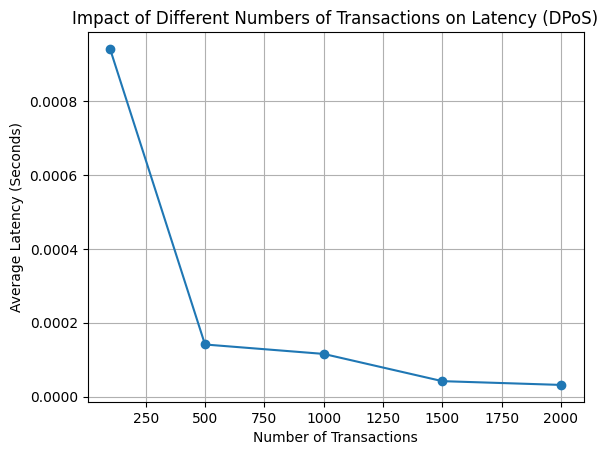

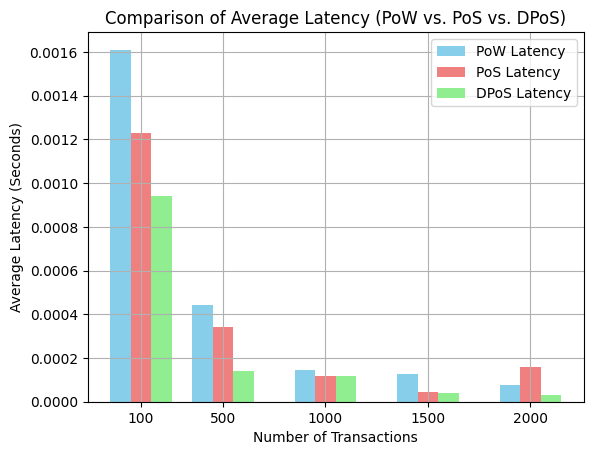

In [20]:
simulate_latency_impact()

In [15]:
import random
import time
from collections import defaultdict

class RaftNode:
    def __init__(self, node_id, total_nodes):
        self.node_id = node_id
        self.total_nodes = total_nodes
        self.current_term = 0
        self.voted_for = None
        self.log = []
        self.commit_index = 0
        self.last_applied = 0
        self.state = "follower"
        self.leader_id = None
        self.timeout = random.randint(150, 300) / 1000.0  # Simulated election timeout
        self.votes_received = defaultdict(lambda: False)
        self.last_heartbeat = time.time()  # Initialize last heartbeat time

    def become_follower(self, term, leader_id):
        self.state = "follower"
        self.current_term = term
        self.voted_for = None
        self.leader_id = leader_id

    def become_candidate(self):
        self.state = "candidate"
        self.current_term += 1
        self.voted_for = self.node_id
        self.votes_received = defaultdict(lambda: False)
   

    def become_leader(self):
        self.state = "leader"
        self.leader_id = self.node_id

    def request_vote(self, term, candidate_id, last_log_index, last_log_term):
        if term < self.current_term:
            return False

        if term > self.current_term:
            self.become_follower(term, None)

        if self.voted_for is None or self.voted_for == candidate_id:
            # Check if candidate's log is at least as up-to-date as our log
            if last_log_term > self.log[-1]["term"] or (
                last_log_term == self.log[-1]["term"] and last_log_index >= len(self.log)
            ):
                self.voted_for = candidate_id
                return True

        return False

    def append_entries(self, term, leader_id, prev_log_index, prev_log_term, entries, leader_commit):
        if term < self.current_term:
            return False

        if term >= self.current_term:
            self.become_follower(term, leader_id)

        if prev_log_index >= len(self.log) or self.log[prev_log_index]["term"] != prev_log_term:
            return False

        self.log = self.log[: prev_log_index + 1] + entries
        if leader_commit > self.commit_index:
            self.commit_index = min(leader_commit, len(self.log) - 1)

        return True

    def send_heartbeat(self):
        # Simulate sending a heartbeat to followers
        pass
    # Inside RaftNode class
    def update_election_timeout(self):
        self.timeout = random.randint(150, 300) / 1000.0

    def simulate(self,max_duration_seconds):
        start_time = time.time()
        while time.time() - start_time < max_duration_seconds:
            if self.state == "follower":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()
            elif self.state == "candidate":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()

                    # Request votes from other nodes
                    votes = 1  # Vote for self
                    for node_id in range(self.total_nodes):
                        if node_id != self.node_id:
                            if self.request_vote(self.current_term, node_id, len(self.log) - 1, self.log[-1]["term"]):
                                votes += 1
                                if votes > self.total_nodes / 2:
                                    self.become_leader()
                                    break
            elif self.state == "leader":
                if time.time() - self.last_heartbeat > 0.1:
                    self.send_heartbeats()  # Send heartbeats to followers
                    self.last_heartbeat = time.time()  # Update last heartbeat time
                    self.update_commit_index()  # Update commit index
            time.sleep(0.1)  # Sleep to avoid busy-waiting

            
            
def find_initial_leader(nodes):
    # Find an initial leader node
    for node in nodes:
        if node.state == "leader":
            return node
    return None

In [16]:
def simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds):
    # Create Raft nodes
    nodes = [RaftNode(node_id, num_nodes) for node_id in range(num_nodes)]
    
    # Manually specify the initial leader node
    initial_leader = nodes[initial_leader_node_id]
    initial_leader.become_leader()

    throughputs = {}
    
    start_time = time.time()  # Initialize the start time
    
    for num_tx in num_transactions_list:
        tx_start_time = time.time()  # Start time for the current transaction loop
        print(f"Starting transaction loop for {num_tx} transactions...")
        
        # Simulate adding transactions
        for _ in range(num_tx):
            # Use the manually specified leader node to propose the transaction
            leader_node = initial_leader

            # In a real Raft implementation, you would send the transaction proposal to other nodes
            # and have them acknowledge it. For simplicity, we'll just increment the commit_index here.
            leader_node.commit_index += 1

        tx_end_time = time.time()
        time_taken = tx_end_time - tx_start_time
        
        # Calculate throughput only if time_taken is greater than zero
        if time_taken > 0:
            throughput = num_tx / time_taken
            throughputs[num_tx] = throughput
        
        print(f"Transaction loop for {num_tx} transactions completed in {time_taken:.2f} seconds.")
        
        # Check if the maximum duration has been reached
        if time.time() - start_time >= max_duration_seconds:
            print(f"Maximum duration of {max_duration_seconds} seconds reached. Exiting.")
            break  # Exit the loop if the maximum duration has been reached

    return throughputs


In [18]:
num_nodes = 5
num_transactions_list = [100, 500, 1000, 1500, 2000]  # Reduced number of transactions
initial_leader_node_id = 0  # Manually specify the initial leader node ID
max_duration_seconds = 60  # Specify the maximum duration of the simulation in seconds
throughputs = simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds)
print(throughputs)

Starting transaction loop for 100 transactions...
Transaction loop for 100 transactions completed in 0.00 seconds.
Starting transaction loop for 500 transactions...
Transaction loop for 500 transactions completed in 0.00 seconds.
Starting transaction loop for 1000 transactions...
Transaction loop for 1000 transactions completed in 0.00 seconds.
Starting transaction loop for 1500 transactions...
Transaction loop for 1500 transactions completed in 0.00 seconds.
Starting transaction loop for 2000 transactions...
Transaction loop for 2000 transactions completed in 0.00 seconds.
{500: 508647.10162503034, 2000: 2000621.9890293346}


In [45]:
import random
import time
from collections import defaultdict

class RaftNode:
    def __init__(self, node_id, total_nodes):
        self.node_id = node_id
        self.total_nodes = total_nodes
        self.current_term = 0
        self.voted_for = None
        self.log = []
        self.commit_index = 0
        self.last_applied = 0
        self.state = "follower"
        self.leader_id = None
        self.timeout = random.randint(150, 300) / 1000.0  # Simulated election timeout
        self.votes_received = defaultdict(lambda: False)
        self.last_heartbeat = time.time()  # Initialize last heartbeat time

    def become_follower(self, term, leader_id):
        self.state = "follower"
        self.current_term = term
        self.voted_for = None
        self.leader_id = leader_id

    def become_candidate(self):
        self.state = "candidate"
        self.current_term += 1
        self.voted_for = self.node_id
        self.votes_received = defaultdict(lambda: False)
   

    def become_leader(self):
        self.state = "leader"
        self.leader_id = self.node_id

    def request_vote(self, term, candidate_id, last_log_index, last_log_term):
        if term < self.current_term:
            return False

        if term > self.current_term:
            self.become_follower(term, None)

        if self.voted_for is None or self.voted_for == candidate_id:
            # Check if candidate's log is at least as up-to-date as our log
            if last_log_term > self.log[-1]["term"] or (
                last_log_term == self.log[-1]["term"] and last_log_index >= len(self.log)
            ):
                self.voted_for = candidate_id
                return True

        return False

    def append_entries(self, term, leader_id, prev_log_index, prev_log_term, entries, leader_commit):
        if term < self.current_term:
            return False

        if term >= self.current_term:
            self.become_follower(term, leader_id)

        if prev_log_index >= len(self.log) or self.log[prev_log_index]["term"] != prev_log_term:
            return False

        self.log = self.log[: prev_log_index + 1] + entries
        if leader_commit > self.commit_index:
            self.commit_index = min(leader_commit, len(self.log) - 1)

        return True

    def send_heartbeat(self):
        # Simulate sending a heartbeat to followers
        pass
    # Inside RaftNode class
    def update_election_timeout(self):
        self.timeout = random.randint(150, 300) / 1000.0

    def simulate(self,max_duration_seconds):
        start_time = time.time()
        while time.time() - start_time < max_duration_seconds:
            if self.state == "follower":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()
            elif self.state == "candidate":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()

                    # Request votes from other nodes
                    votes = 1  # Vote for self
                    for node_id in range(self.total_nodes):
                        if node_id != self.node_id:
                            if self.log and self.request_vote(self.current_term, node_id, len(self.log) - 1, self.log[-1]["term"]):
                                votes += 1
                                if votes > self.total_nodes / 2:
                                    self.become_leader()
                                    break
            elif self.state == "leader":
                if time.time() - self.last_heartbeat > 0.1:
                    self.send_heartbeats()  # Send heartbeats to followers
                    self.last_heartbeat = time.time()  # Update last heartbeat time
                    self.update_commit_index()  # Update commit index
            time.sleep(0.1)  # Sleep to avoid busy-waiting

  
    def process_transaction(self):
        # Simulate transaction processing
        self.transaction_processing_time = random.uniform(0.1, 0.5)  # Simulated transaction processing time
        time.sleep(self.transaction_processing_time)
            
def find_initial_leader(nodes):
    # Find an initial leader node
    for node in nodes:
        if node.state == "leader":
            return node
    return None

In [46]:
def simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds):
    nodes = [RaftNode(node_id, num_nodes) for node_id in range(num_nodes)]

    throughputs = {}

    for num_tx in num_transactions_list:
        start_time = time.time()
        print(f"Starting transaction loop for {num_tx} transactions...")

        # Reset all nodes to "follower" state
        for node in nodes:
            node.state = "follower"
        
        # Find the initial leader node
        initial_leader = nodes[initial_leader_node_id]
        initial_leader.become_leader()

        # Track how many transactions have been processed by all nodes
        transactions_processed = 0

        while transactions_processed < num_tx:
            leader_node = find_initial_leader(nodes)

            if leader_node is not None:
                leader_node.process_transaction()
                transactions_processed += 1

        end_time = time.time()
        print(f"Transaction loop for {num_tx} transactions completed in {end_time - start_time:.2f} seconds.")

        time_taken = end_time - start_time
        if time_taken > 0:
            throughput = num_tx / time_taken
            throughputs[num_tx] = throughput

    return throughputs


In [47]:
num_nodes = 5
num_transactions_list = [100, 500, 1000, 1500, 2000]  # Reduced number of transactions
initial_leader_node_id = 0  # Manually specify the initial leader node ID
max_duration_seconds = 60  # Specify the maximum duration of the simulation in seconds
throughputs = simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds)
print(throughputs)

Starting transaction loop for 100 transactions...
Transaction loop for 100 transactions completed in 28.74 seconds.
Starting transaction loop for 500 transactions...
Transaction loop for 500 transactions completed in 155.72 seconds.
Starting transaction loop for 1000 transactions...
Transaction loop for 1000 transactions completed in 306.72 seconds.
Starting transaction loop for 1500 transactions...
Transaction loop for 1500 transactions completed in 461.34 seconds.
Starting transaction loop for 2000 transactions...
Transaction loop for 2000 transactions completed in 617.86 seconds.
{100: 3.479446440118969, 500: 3.210797310309934, 1000: 3.2603151993831214, 1500: 3.251374132358427, 2000: 3.2370051001612703}


In [50]:
import random
import time
from collections import defaultdict

class RaftNode:
    def __init__(self, node_id, total_nodes):
        self.node_id = node_id
        self.total_nodes = total_nodes
        self.current_term = 0
        self.voted_for = None
        self.log = []
        self.commit_index = 0
        self.last_applied = 0
        self.state = "follower"
        self.leader_id = None
        self.timeout = random.randint(150, 300) / 1000.0  # Simulated election timeout
        self.votes_received = defaultdict(lambda: False)
        self.last_heartbeat = time.time()  # Initialize last heartbeat time

    def become_follower(self, term, leader_id):
        self.state = "follower"
        self.current_term = term
        self.voted_for = None
        self.leader_id = leader_id

    def become_candidate(self):
        self.state = "candidate"
        self.current_term += 1
        self.voted_for = self.node_id
        self.votes_received = defaultdict(lambda: False)
   

    def become_leader(self):
        self.state = "leader"
        self.leader_id = self.node_id

    def request_vote(self, term, candidate_id, last_log_index, last_log_term):
        if term < self.current_term:
            return False

        if term > self.current_term:
            self.become_follower(term, None)

        if self.voted_for is None or self.voted_for == candidate_id:
            # Check if candidate's log is at least as up-to-date as our log
            if last_log_term > self.log[-1]["term"] or (
                last_log_term == self.log[-1]["term"] and last_log_index >= len(self.log)
            ):
                self.voted_for = candidate_id
                return True

        return False

    def append_entries(self, term, leader_id, prev_log_index, prev_log_term, entries, leader_commit):
        if term < self.current_term:
            return False

        if term >= self.current_term:
            self.become_follower(term, leader_id)

        if prev_log_index >= len(self.log) or self.log[prev_log_index]["term"] != prev_log_term:
            return False

        self.log = self.log[: prev_log_index + 1] + entries
        if leader_commit > self.commit_index:
            self.commit_index = min(leader_commit, len(self.log) - 1)

        return True

    def send_heartbeat(self):
        # Simulate sending a heartbeat to followers
        pass
    # Inside RaftNode class
    def update_election_timeout(self):
        self.timeout = random.randint(150, 300) / 1000.0

    def simulate(self,max_duration_seconds):
        start_time = time.time()
        while time.time() - start_time < max_duration_seconds:
            if self.state == "follower":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()
            elif self.state == "candidate":
                if time.time() - self.last_heartbeat > self.timeout:
                    self.update_election_timeout()  # Update election timeout
                    self.become_candidate()

                    # Request votes from other nodes
                    votes = 1  # Vote for self
                    for node_id in range(self.total_nodes):
                        if node_id != self.node_id:
                            if self.log and self.request_vote(self.current_term, node_id, len(self.log) - 1, self.log[-1]["term"]):
                                votes += 1
                                if votes > self.total_nodes / 2:
                                    self.become_leader()
                                    break
            elif self.state == "leader":
                if time.time() - self.last_heartbeat > 0.1:
                    self.send_heartbeats()  # Send heartbeats to followers
                    self.last_heartbeat = time.time()  # Update last heartbeat time
                    self.update_commit_index()  # Update commit index
            time.sleep(0.1)  # Sleep to avoid busy-waiting

  
    def process_transaction(self):
        # Simulate transaction processing
        self.transaction_processing_time = random.uniform(0.001, 0.005)  # Simulated transaction processing time
        time.sleep(self.transaction_processing_time)
            
def find_initial_leader(nodes):
    # Find an initial leader node
    for node in nodes:
        if node.state == "leader":
            return node
    return None

In [112]:
def simulate_raft_throughputs():
    num_nodes = 5
    num_transactions_list = [100, 500, 1000, 1500, 2000]  # Reduced number of transactions
    initial_leader_node_id = 0  # Manually specify the initial leader node ID
    max_duration_seconds = 5  # Specify the maximum duration of the simulation in seconds
    
    nodes = [RaftNode(node_id, num_nodes) for node_id in range(num_nodes)]

    throughputs = {}

    for num_tx in num_transactions_list:
        start_time = time.time()
        print(f"Starting transaction loop for {num_tx} transactions...")

        # Reset all nodes to "follower" state
        for node in nodes:
            node.state = "follower"
        
        # Find the initial leader node
        initial_leader = nodes[initial_leader_node_id]
        initial_leader.become_leader()

        # Track how many transactions have been processed by all nodes
        transactions_processed = 0

        while transactions_processed < num_tx:
            leader_node = find_initial_leader(nodes)

            if leader_node is not None:
                leader_node.process_transaction()
                transactions_processed += 1

        end_time = time.time()
        print(f"Transaction loop for {num_tx} transactions completed in {end_time - start_time:.2f} seconds.")

        time_taken = end_time - start_time
        if time_taken > 0:
            throughput = num_tx / time_taken
            throughputs[num_tx] = throughput

    visualize_raft_throughput(throughputs)


In [52]:
num_nodes = 5
num_transactions_list = [100, 500, 1000, 1500, 2000]  # Reduced number of transactions
initial_leader_node_id = 0  # Manually specify the initial leader node ID
max_duration_seconds = 5  # Specify the maximum duration of the simulation in seconds
throughputs = simulate_raft_throughputs(num_nodes, num_transactions_list, initial_leader_node_id, max_duration_seconds)
print(throughputs)

Starting transaction loop for 100 transactions...
Transaction loop for 100 transactions completed in 1.58 seconds.
Starting transaction loop for 500 transactions...
Transaction loop for 500 transactions completed in 7.98 seconds.
Starting transaction loop for 1000 transactions...
Transaction loop for 1000 transactions completed in 15.95 seconds.
Starting transaction loop for 1500 transactions...
Transaction loop for 1500 transactions completed in 24.02 seconds.
Starting transaction loop for 2000 transactions...
Transaction loop for 2000 transactions completed in 32.19 seconds.
{100: 63.24365468150066, 500: 62.63880082242339, 1000: 62.69428457157205, 1500: 62.43851688395849, 2000: 62.13557300086229}


Starting transaction loop for 100 transactions...
Transaction loop for 100 transactions completed in 1.60 seconds.
Starting transaction loop for 500 transactions...
Transaction loop for 500 transactions completed in 7.93 seconds.
Starting transaction loop for 1000 transactions...
Transaction loop for 1000 transactions completed in 15.92 seconds.
Starting transaction loop for 1500 transactions...
Transaction loop for 1500 transactions completed in 23.89 seconds.
Starting transaction loop for 2000 transactions...
Transaction loop for 2000 transactions completed in 31.78 seconds.


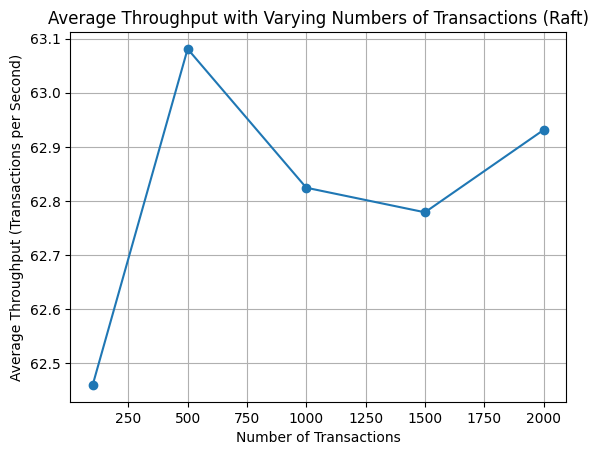

In [113]:
simulate_raft_throughputs()

In [56]:
def visualize_raft_throughput(throughputs):
    plt.plot(throughputs.keys(), throughputs.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Throughput (Transactions per Second)')
    plt.title('Average Throughput with Varying Numbers of Transactions (Raft)')
    plt.grid(True)
    plt.show()

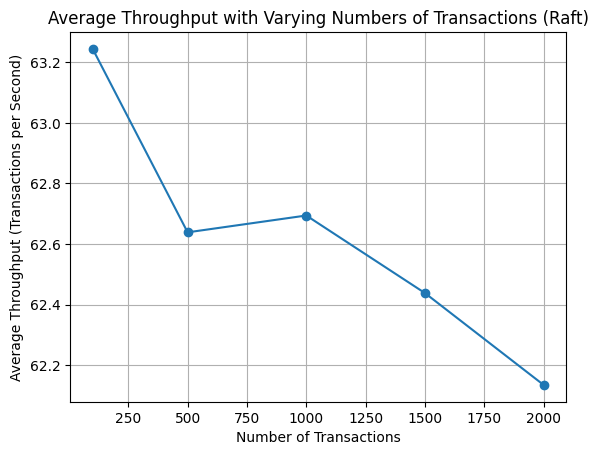

In [57]:
visualize_raft_throughput(throughputs)

In [115]:
def visualize_raft_latency_impact(latencies):
    plt.plot(latencies.keys(), latencies.values(), marker='o')
    plt.xlabel('Number of Transactions')
    plt.ylabel('Average Latency (Seconds)')
    plt.title('Impact of Different Numbers of Transactions on Latency (Raft)')
    plt.grid(True)
    plt.show()

In [118]:
def simulate_raft_latency_impact():
    num_transactions = [100, 500, 1000, 1500, 2000]
    raft_latencies = {}

    for num_tx in num_transactions:
        #nodes = [RaftNode(node_id) for node_id in range(num_nodes)]
        nodes = [RaftNode(node_id, num_nodes) for node_id in range(num_nodes)]
        start_time = time.time()

        # Simulate Raft behavior
        for node in nodes:
            node.simulate(max_duration_seconds)

        end_time = time.time()

        # Calculate average latency per transaction
        latency = (end_time - start_time) / num_tx
        raft_latencies[num_tx] = latency

    # Visualize the impact of different numbers of transactions on Raft latency
    visualize_raft_latency_impact(raft_latencies)


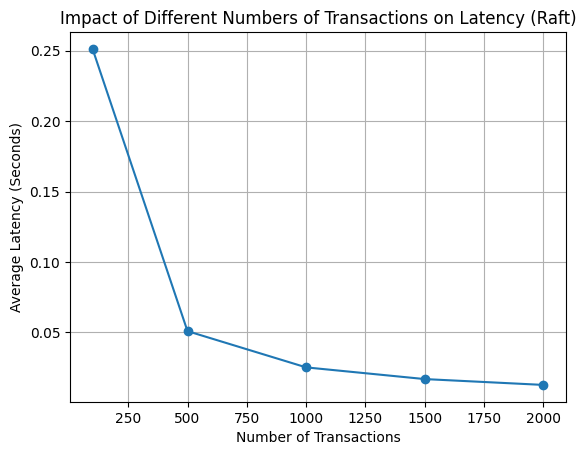

In [119]:
simulate_raft_latency_impact()

In [107]:
import hashlib

class PoWConsensus:
    @staticmethod
    def proof_of_work(last_proof, difficulty=5):
        proof = 0
        while PoWConsensus.validate_proof(last_proof, proof, difficulty) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof, difficulty=5):
        guess = f"{last_proof}{proof}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:difficulty] == "0" * difficulty


In [110]:
def simulate_pow_throughputs():
    blockchain_pow = Blockchain()
    num_transactions_pow = [100, 500, 1000, 1500, 2000]
    throughputs_pow = {}

    for num_tx in num_transactions_pow:
        start_time = time.time()
        for _ in range(num_tx):
            blockchain_pow.add_transaction("Arafat", "Chopra", 1)
        last_block_pow = blockchain_pow.last_block()
        last_proof_pow = last_block_pow.proof
        
        # Adjust the difficulty level as needed (e.g., difficulty=4)
        proof_pow = PoWConsensus.proof_of_work(last_proof_pow, difficulty=5)
        
        blockchain_pow.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pow = blockchain_pow.hash(last_block_pow)
        blockchain_pow.create_block(proof_pow, previous_hash_pow)
        end_time = time.time()
        throughput_pow = num_tx / (end_time - start_time)
        throughputs_pow[num_tx] = throughput_pow
        print(throughputs_pow)
    visualize_pow_throughput(throughputs_pow)


{100: 67.74411957763294}
{100: 67.74411957763294, 500: 270.33045083390965}
{100: 67.74411957763294, 500: 270.33045083390965, 1000: 293.38548324165646}
{100: 67.74411957763294, 500: 270.33045083390965, 1000: 293.38548324165646, 1500: 917.3795612849266}
{100: 67.74411957763294, 500: 270.33045083390965, 1000: 293.38548324165646, 1500: 917.3795612849266, 2000: 1664.9144123742524}


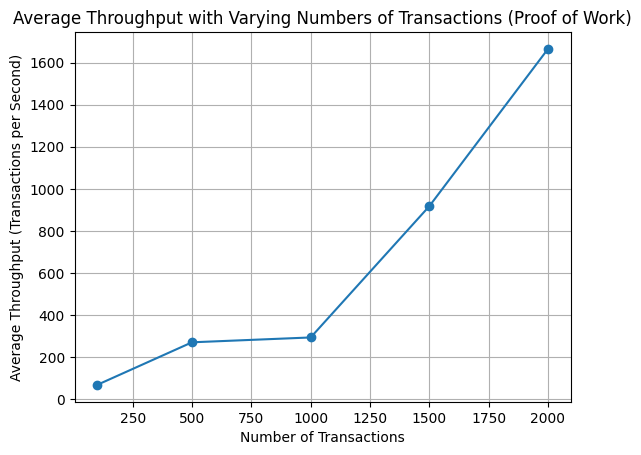

In [111]:
simulate_pow_throughputs() 

In [128]:
def simulate_latency_with_nodes_raft(num_nodes):
    # Simulate Raft latency with varying numbers of nodes
    latencies = {}
    for num_n in num_nodes:
        nodes = [RaftNode(node_id, num_n) for node_id in range(num_n)]
        start_time = time.time()

        # Simulate Raft behavior
        for node in nodes:
            node.simulate(max_duration_seconds=5)

        end_time = time.time()
        latencies[num_n] = (end_time - start_time) / 1000  # Average latency over 1000 transactions
    return latencies

# Average latency with varying numbers of nodes
num_nodes = [5, 10, 15, 20, 25, 30, 35, 40]

# Simulate latency for Raft with varying numbers of nodes
raft_latencies = simulate_latency_with_nodes_raft(num_nodes)


In [138]:
print(raft_latencies)

{5: 0.025405073881149293, 10: 0.050292997598648075, 15: 0.07567294120788574, 20: 0.10112543940544129, 25: 0.12642685627937317, 30: 0.1522200915813446, 35: 0.17678820204734802, 40: 0.20253890872001648}


In [127]:
num_nodes = [5, 10, 15, 20, 25, 30, 35, 40]
t=simulate_latency_with_nodes_raft(num_nodes)

TypeError: 'list' object cannot be interpreted as an integer

In [ ]:

class PoWConsensus:
    @staticmethod
    def proof_of_work(last_proof, difficulty=6):
        proof = 0
        while PoWConsensus.validate_proof(last_proof, proof, difficulty) is False:
            proof += 1
        return proof

    @staticmethod
    def validate_proof(last_proof, proof, difficulty=6):
        guess = f"{last_proof}{proof}".encode()
        guess_hash = hashlib.sha256(guess).hexdigest()
        return guess_hash[:difficulty] == "0" * difficulty


def verify_transaction(transaction):
    # Verify if the transaction is valid
    if 'sender' not in transaction or 'recipient' not in transaction or 'amount' not in transaction:
        return False  # Transaction must have sender, recipient, and amount fields

    sender = transaction['sender']
    recipient = transaction['recipient']
    amount = transaction['amount']

    # Additional verification logic can be added here
    # For example, checking sender's balance, transaction signatures, etc.

    return True  # Return True if the transaction is valid, False otherwise



def simulate_pow_throughputs():
    blockchain_pow = Blockchain()
    num_transactions_pow = [100, 500, 1000, 1500, 2000]
    throughputs_pow = {}

    for num_tx in num_transactions_pow:
        start_time = time.time()
        for _ in range(num_tx):
            sender = "Arafat"
            recipient = "Chopra"
            amount = 1

            # Verify the transaction before adding it to the blockchain
            if verify_transaction({"sender": sender, "recipient": recipient, "amount": amount}):
                blockchain_pow.add_transaction(sender, recipient, amount)
            else:
                print("Invalid transaction:", {"sender": sender, "recipient": recipient, "amount": amount})

        last_block_pow = blockchain_pow.last_block()
        last_proof_pow = last_block_pow.proof
        
        # Adjust the difficulty level as needed (e.g., difficulty=4)
        proof_pow = PoWConsensus.proof_of_work(last_proof_pow, difficulty=6)
        
        blockchain_pow.add_transaction(sender="0", recipient="MinerAddress", amount=1)
        previous_hash_pow = blockchain_pow.hash(last_block_pow)
        blockchain_pow.create_block(proof_pow, previous_hash_pow)
        end_time = time.time()
        if end_time != start_time:
            throughput_pow = num_tx / (end_time - start_time)
            throughputs_pow[num_tx] = throughput_pow
        else:
            print("Zero time difference, throughput not calculated for", num_tx, "transactions")
        

        print(throughputs_pow)
    visualize_pow_throughput(throughputs_pow)


simulate_pow_throughputs()


In [157]:
def visualize_latency_with_nodes(pow_latencies, pos_latencies, dpos_latencies, raft_latencies, num_nodes):
    num_nodes_pow = list(pow_latencies.keys())
    pow_latency_values = [pow_latencies[num_n] for num_n in num_nodes_pow]
    
    num_nodes_pos = list(pos_latencies.keys())
    pos_latency_values = [pos_latencies[num_n] for num_n in num_nodes_pos]
    
    num_nodes_dpos = list(dpos_latencies.keys())
    dpos_latency_values = [dpos_latencies[num_n] for num_n in num_nodes_dpos]

    num_nodes_raft = list(raft_latencies.keys())
    raft_latency_values = [raft_latencies[num_n] for num_n in num_nodes_raft]

    width = 1.3
    fig, ax = plt.subplots()
    
    bar1 = ax.bar([num - width for num in num_nodes_pow], pow_latency_values, width,
                  label='PoW Latency', color='royalblue', edgecolor='none', linewidth=0.1)
    
    bar2 = ax.bar(num_nodes_pos, pos_latency_values, width,
                  label='PoS Latency', color='orange', edgecolor='none', linewidth=0.1)
    
    bar3 = ax.bar([num + width for num in num_nodes_dpos], dpos_latency_values, width,
                  label='DPoS Latency', color='green', edgecolor='none', linewidth=0.1)
    
    bar4 = ax.bar([num + 2*width for num in num_nodes_raft], raft_latency_values, width,
                  label='Raft Latency', color='purple', edgecolor='none', linewidth=0.1)

    ax.set_xlabel('Number of Nodes')
    ax.set_ylabel('Average Latency (Seconds)')
    ax.set_title('Average Latency with Varying Numbers of Nodes')
    ax.set_xticks(num_nodes_pow + num_nodes_pos + num_nodes_dpos + num_nodes_raft)
    ax.legend()
    ax.grid(True)

    plt.show()


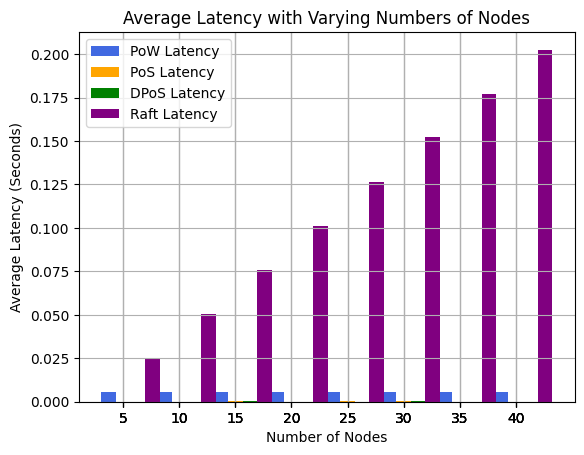

In [159]:
num_nodes = [5, 10, 15, 20, 25, 30, 35, 40]
visualize_latency_with_nodes(pow_latencies, pos_latencies, dpos_latencies, raft_latencies, num_nodes)